   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
        age  sex       bmi  children  smoker  region   charges
0  0.021739    0  0.32

C:\Users\253ia\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[199   4   1   0]
 [ 15  10  10   0]
 [  0   5  19   0]
 [  0   1   4   0]] 0.8507462686567164
accuracy: 0.85


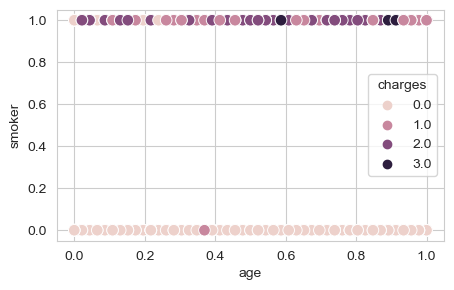

In [1]:
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score # для определения качества модели
from sklearn.model_selection import train_test_split

data_set = pd.read_csv("insurance.csv")
print(data_set.head())
print(data_set.describe())

scaler_mnmx = sk.preprocessing.MinMaxScaler()
sex_code = {"female": 0, "male": 1}
region_code = {"southwest": 0, "northwest": 1, "northeast": 2, "southeast": 3}
smoke_code = {"yes": 1, "no": 0}
data_set["sex"] = data_set["sex"].replace(sex_code)
data_set["region"] = data_set["region"].replace(region_code)
data_set["smoker"] = data_set["smoker"].replace(smoke_code)
data_set["age"] = scaler_mnmx.fit_transform(data_set[["age"]])
data_set["bmi"] = scaler_mnmx.fit_transform(data_set[["bmi"]])
data_set["children"] = scaler_mnmx.fit_transform(data_set[["children"]])
data_set["charges"] = scaler_mnmx.fit_transform(data_set[["charges"]])
print(data_set.head())
charges = data_set.loc[:,["charges"]]
for i in range(len(charges)):
    if charges.iloc[i,0] <  0.25:
        charges.iloc[i,0] = 0
    elif charges.iloc[i,0] < 0.5:
        charges.iloc[i,0] = 1
    elif charges.iloc[i,0] < 0.75:
        charges.iloc[i,0] = 2
    else:
        charges.iloc[i,0] = 3
data_set["charges"] = charges

print(data_set.head())

X_train, X_test, y_train, y_test = train_test_split(
    # поскольку наша бд это pandas-таблица, для нее нужно указыать iloc
    data_set.loc[:, "age":"region"],  # берем все колонки кроме последней
    data_set.loc[:, "charges"], # последнюю в целевую переменную(класс)(то что будем предсказывать)
    test_size = 0.20 # Размер тестовой выборки 20%
)


# Обучим метод к ближйшх соседей
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train, y_train)

# Получим предсказание модели
y_pred = model.predict(X_test)

# Покажем на графике, что скажет полученное число.
# Красным цветом обозначим точки, для которых классификация сработала неправильно.
plt.figure(figsize=(5,3))
sns.scatterplot(x = 'age', y = 'smoker', data=data_set, hue='charges', s = 70)

cm = sk.metrics.confusion_matrix(y_test, y_pred) # Матрица ошибок
ac = sk.metrics.accuracy_score(y_test, y_pred)
print(cm, ac)
print(f'accuracy: {accuracy_score(y_test, y_pred) :.2}')

In [22]:
charges = data_set.loc[:,["charges"]]
for i in range(len(charges)):
    if charges.iloc[i,0] <  0.25:
        charges.iloc[i,0] = 0
    elif charges.iloc[i,0] < 0.5:
        charges.iloc[i,0] = 1
    elif charges.iloc[i,0] < 0.75:
        charges.iloc[i,0] = 2
    else:
        charges.iloc[i,0] = 3
data_set["charges"] = charges
data_set.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0,0.321227,0.0,1,0,3.0
1,0.000000,1,0.479150,0.2,0,3,0.0
2,0.217391,1,0.458434,0.6,0,3,0.0
3,0.326087,1,0.181464,0.0,0,1,3.0
4,0.304348,1,0.347592,0.0,0,1,0.0


In [ ]:
#data_set = data_set[["age", "sex","bmi","children", "smoker", "charges", "region"]]
# charges = data_set["charges"]

# Мы делим расходы на 4 категории:
# 0 - низкие расходы, 1 - расходы ниже среднего, 2 - расходы выше среднего, 3 - высокие расходы
# quarter = (min(charges) + max(charges))/ 4
# half = (min(charges) + max(charges))/ 2
# for i in range(len(charges)):
#     if charges[i] <  quarter:
#         charges[i] = 0
#     elif charges[i] < half:
#         charges[i] = 1
#     elif charges[i] < half + quarter:
#         charges[i] = 2
#     else:
#         charges[i] = 3
# data_set["charges"] = charges
# print(max(charges))

#scaler_z = sk.preprocessing.StandardScaler()

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

#create DataFrame
# df = pd.DataFrame({'x1': [13.34, 12.67, 12.64, 13.67, 12.8],
#                    'x2': [0.94, 0.98, 1.36, 1.25, 0.61],
#                    'x3': [2.36, 2.24, 2.02, 1.92, 1.48],
#                    'group':['A', 'A', 'B', 'B', 'B']})
#

#print(abs(a1 - x1) + abs(a2 - x2) + abs(a3 - x3))

x_0 = np.array([13.34, 0.94, 2.36])
x_1 = np.array([12.67, 0.98, 2.24 ])
x_2 = np.array([12.64, 1.36, 2.02])
x_3 = np.array([13.67, 1.25, 1.92])
x_4 = np.array([12.8, 0.61, 1.48])
a = np.array([12.7, 0.8, 2.4])

# groups = df.groupby('group')
# for name, group in groups:
#     plt.plot (group.x1, group.x2, group.x3,  marker='o', linestyle='', markersize=12, label=name, )
#
# plt.legend()

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(x_0[0], x_0[1], x_0[2], color='r')
ax.scatter(x_1[0], x_1[1], x_1[2], color='r')
ax.scatter(x_2[0], x_2[1], x_2[2], color='b')
ax.scatter(x_3[0], x_3[1], x_3[2], color='b')
ax.scatter(x_4[0], x_4[1], x_4[2], color='b')
ax.scatter(a[0], a[1], a[2],  color='g')


plt.show()